# Introduction to Machine Learning

We will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Converting Dataset to DataFrame

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 

Convert the sklearn.dataset `cancer` to a DataFrame. 

In [3]:
def answer_one():
    df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
    df['target']=cancer['target']
    return df

### Class Distribution
What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)

*This function will return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [4]:
def answer_two():
    cancerdf = answer_one()
    df = cancerdf.groupby('target').count()['mean radius']
    df.index=['malignant', 'benign']
    return df

### Extrating X and y From DataFrame
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function will return a tuple of length 2:* `(X, y)`*, where* 
* `X`*, a pandas DataFrame*.
* `y`*, a pandas Series*.

In [5]:
def answer_three():
    cancerdf = answer_one()
    X = cancerdf[cancer['feature_names']]
    y = cancerdf['target']
    return X, y

### Spliting dataset into training dataset and test dataset
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

*This function will return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`

In [6]:
def answer_four():
    X, y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    return X_train, X_test, y_train, y_test

### Using KNeighborsClassifier
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function will return a * `sklearn.neighbors.classification.KNeighborsClassifier`.

In [7]:
def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    
    return knn

### Predicting uisng KNN classifier
Using your knn classifier, predict the class label using the mean value for each feature.

*This function will return a numpy array either `array([ 0.])` or `array([ 1.])`*

In [8]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    knn = answer_five()
    p = knn.predict(means)
    
    return p

answer_six()

array([1])

Using your knn classifier, predict the class labels for the test set `X_test`.

*This function will return a numpy array and values either `0.0` or `1.0`.*

In [9]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    p = knn.predict(X_test)
    
    return p

answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Score of KNN classifier
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

In [10]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    score = knn.score(X_test, y_test)
    
    return score

answer_eight()

0.916083916083916

### Plot

Using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [11]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<IPython.core.display.Javascript object>


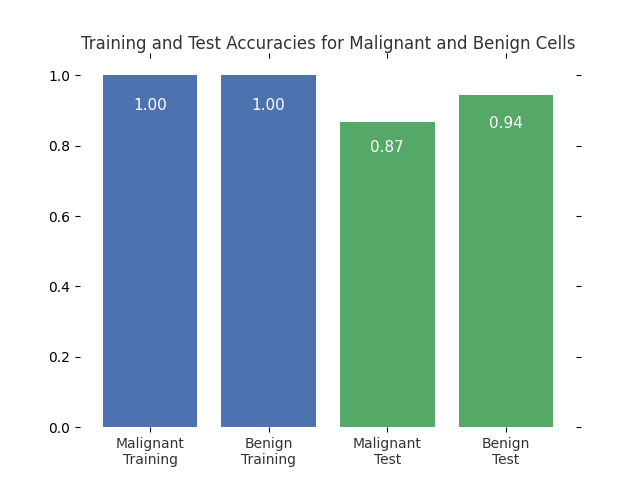

In [12]:
accuracy_plot() 